In [2]:
from modules.lof_calcs import *
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

## Non-binary analysis of the LOF data

In [3]:
Control_2000_het_nb = pd.read_csv("data/Control_2000_het.tsv", sep = '\t', index_col=0)
Treated_2000_het_nb = pd.read_csv("data/Treatment_2000_het.tsv", sep = '\t', index_col=0)
Treated_1972_het_nb = pd.read_csv("data/Treatment_1972_het.tsv", sep = '\t', index_col=0)

Control_2000_hom_nb = pd.read_csv("data/Control_2000_hom.tsv", sep = '\t', index_col=0)
Treated_2000_hom_nb = pd.read_csv("data/Treatment_2000_hom.tsv", sep = '\t', index_col=0)
Treated_1972_hom_nb = pd.read_csv("data/Treatment_1972_hom.tsv", sep = '\t', index_col=0)

In [4]:
Control_2000_het_nb_melt = pd.melt(Control_2000_het_nb, var_name="sample", value_name="LOF", ignore_index=False)
Control_2000_het_nb_melt['zygosity'] = "heterozygous"
Treated_2000_het_nb_melt = pd.melt(Treated_2000_het_nb, var_name="sample", value_name="LOF", ignore_index=False)
Treated_2000_het_nb_melt['zygosity'] = "heterozygous"
Treated_1972_het_nb_melt = pd.melt(Treated_1972_het_nb, var_name="sample", value_name="LOF", ignore_index=False)
Treated_1972_het_nb_melt['zygosity'] = "heterozygous"

In [5]:
Control_2000_hom_nb_melt = pd.melt(Control_2000_hom_nb, var_name="sample", value_name="LOF", ignore_index=False)
Control_2000_hom_nb_melt['zygosity'] = "homozygous"
Treated_2000_hom_nb_melt = pd.melt(Treated_2000_hom_nb, var_name="sample", value_name="LOF", ignore_index=False)
Treated_2000_hom_nb_melt['zygosity'] = "homozygous"
Treated_1972_hom_nb_melt = pd.melt(Treated_1972_hom_nb, var_name="sample", value_name="LOF", ignore_index=False)
Treated_1972_hom_nb_melt['zygosity'] = "homozygous"

In [7]:
to_merge_nb = [Control_2000_het_nb_melt, Treated_2000_het_nb_melt, Treated_1972_het_nb_melt,
               Control_2000_hom_nb_melt, Treated_2000_hom_nb_melt, Treated_1972_hom_nb_melt]

merged_nb = pd.concat(to_merge_nb)

In [8]:
merged_nb_ann = add_gff_metadata(merged_nb, "Sm_ManualCuration.v1.1.2.gff")
merged_nb_ann = merged_nb_ann[merged_nb_ann.chromosome != 'Sm_plastid']
merged_nb_ann = merged_nb_ann[merged_nb_ann.chromosome != 'Sm_mitochondrion']

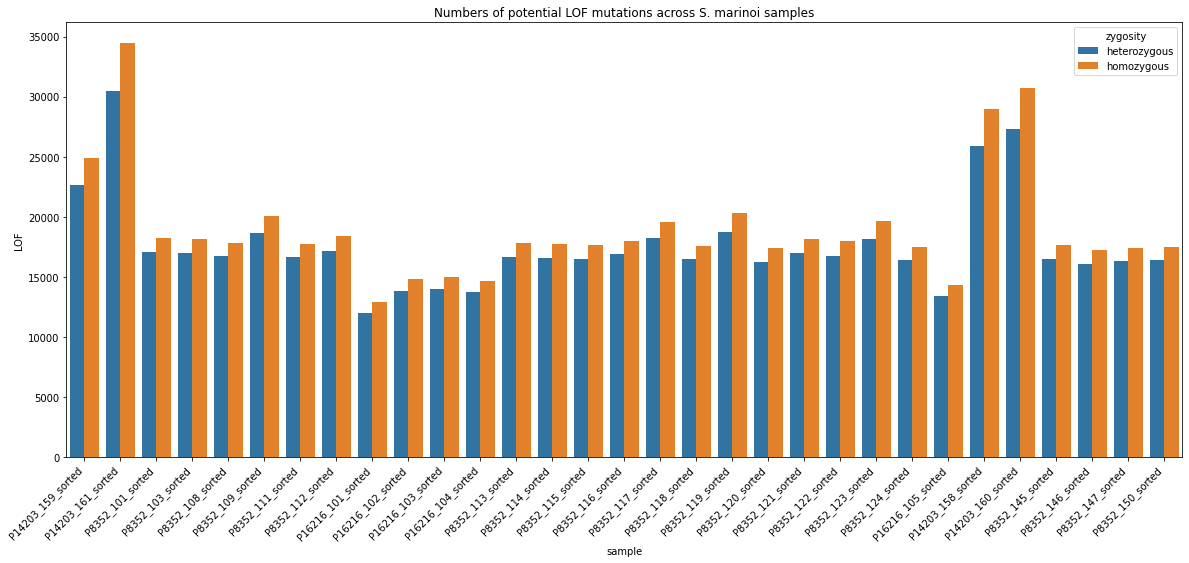

In [9]:
plt.figure(figsize=(20, 8))

plt_order = Control_2000_het_nb.columns.tolist() + Treated_2000_het_nb.columns.tolist() + Treated_1972_het_nb.columns.tolist()

p = sns.barplot(data=merged_nb_ann,
            x='sample', 
            y='LOF',
            hue='zygosity',
            estimator=sum, 
            ci=None,
            order=plt_order)
p.set_xticklabels(p.get_xticklabels(),rotation=45, ha="right")
p.set_title('Numbers of potential LOF mutations across S. marinoi samples');

### Plotting numbers of mutations per gene

In [164]:
Control_2000_het_nb_melt_nopm = Control_2000_het_nb_melt[~Control_2000_het_nb_melt.index.str.contains("Sm_plastid|Sm_mito")]
merged_nb_ann_cumsum = merged_nb_ann.copy()
#count genes with 1 LOF mutation per sample
#merged_nb_ann_cumsum['LOF_count_1'] = merged_nb_ann_cumsum[merged_nb_ann_cumsum['LOF'] == 1]['sample'].cumsum()
#merged_nb_ann_cumsum['LOF_count_1'] = merged_nb_ann_cumsum[(merged_nb_ann_cumsum['LOF'] = 1)]
merged_nb_ann_cumsum['genes'] = merged_nb_ann_cumsum.index

#merged_nb_ann_cumsum.groupby('sample')['genes'].apply(lambda x: x[x == 'one'].count())
#merged_nb_ann_cumsum['LOF_count_1'] = 
#merged_nb_ann_cumsum[merged_nb_ann_cumsum.groupby(['sample','genes','LOF'])]

df = pd.DataFrame()
df['sample'] = merged_nb_ann_cumsum['sample'].unique()
#merged_nb_ann_cumsum
#df['LOF_count_1'] = merged_nb_ann_cumsum['']

#PSEUDOCODE
#for each sample
#for each gene
#if LOF count = 1
#count +1 for column LOF_count_1 for that gene, that sample
#after loop, sum rows by sample

samples = merged_nb_ann_cumsum.head(20).groupby('sample')
#print(samples.groups)

for sample, group in samples:
        for gene in group['genes']:
            #print(group['LOF'])
            #print(sample)
            #print(gene)
            #print(group[])
            #print(group.iloc[group.index, sample])
            #print(group)
            if group['LOF'].item == 0:
                df['LOF_count_0'][sample] += 1
            elif group['LOF'].item == 1:
                df['LOF_count_1'][sample] += 1
            elif group['LOF'].item == 2:
                df['LOF_count_2'][sample] += 1
            elif group['LOF'].item == 3:
                df['LOF_count_3'][sample] += 1
            elif group['LOF'].item == 4:
                df['LOF_count_4'][sample] += 1
            elif group['LOF'].item == 5:
                df['LOF_count_5'][sample] += 1
#            elif group[(group['LOF'] >= 6 & group['LOF'] <= 10)]:
#                df['LOF_count_6_10'][sample] += 1
            else:
                #print('bardamerda')

SyntaxError: unexpected EOF while parsing (<ipython-input-164-24a83ab58015>, line 50)

In [197]:
for mytuple, value in merged_nb_ann_cumsum.head(20)[['sample','genes','LOF']].stack().iteritems():
    if value == 0:
        df['LOF_count_0'][sample] += 1
    elif value == 1:
        df['LOF_count_1'][sample] += 1
    elif value == 2:
        df['LOF_count_2'][sample] += 1
    elif value == 3:
        df['LOF_count_3'][sample] += 1
    elif value == 4:
        df['LOF_count_4'][sample] += 1
    elif value == 5:
        df['LOF_count_5'][sample] += 1
#    elif value < 5:
#        df['LOF_count_6_10'][sample] += 1
    else:
        print('bardamerda')
    

bardamerda
bardamerda
bardamerda
bardamerda
bardamerda
bardamerda
bardamerda
bardamerda


KeyError: 'LOF_count_5'

In [ ]:
#create the groupby object for df
samples = merged_nb_ann_cumsum.groupby('sample')

#set counters
a=0
b=0
c=0
d=0
e=0
f=0
g=0
h=1

#create lists
sample_list = []
LOF_count_0 = []
LOF_count_1 = []
LOF_count_2 = []
LOF_count_3 = []
LOF_count_4 = []
LOF_count_5 = []
LOF_count_6_10 = []
LOF_count_11_plus = []

#iterate over values for LOF
for mytuple, value in merged_nb_ann_cumsum[['LOF']].stack().iteritems():
    #for every sample
    for sample, group in samples:
        #if LOF value for that gene is 0, add one to counter
        if value == 0:
            a = a + 1
        elif value == 1:
            b = b + 1
        elif value == 2:
            c = c + 1
        elif value == 3:
            d = d + 1
        elif value == 4:
            e = e + 1
        elif value == 5:
            f = f + 1
        elif value > 5 & value <= 10:
            g = g + 1
        else:
            h = h + 1

#append samples to sample list
sample_list.append(sample)
#append counter to list
LOF_count_0.append(a)
LOF_count_1.append(b)
LOF_count_2.append(c)
LOF_count_3.append(d)
LOF_count_4.append(e)
LOF_count_5.append(f)
LOF_count_6_10.append(g)
LOF_count_11_plus.append(h)

#df['LOF_count_0'] = LOF_count_0
#df['LOF_count_1'] = LOF_count_1
#df['LOF_count_2'] = LOF_count_2
#df['LOF_count_3'] = LOF_count_3
#df['LOF_count_4'] = LOF_count_4
#df['LOF_count_5'] = LOF_count_5
#df['LOF_count_6_10'] = LOF_count_6_10
#df['LOF_count_11_plus'] = LOF_count_11_plus